# Scheduler 시각화

In [26]:
import torch.optim
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer = nn.Sequential(
             nn.Linear(100,10),
             nn.LogSoftmax(dim=1),
        )
            
    def forward(self, x):
        x = self.layer(x)
        return x

model = Model()
epochs = 100
lr = 0.1

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer=optimizer,
    base_lr=1e-5,
    max_lr=1e-3,
    step_size_up=5,
    step_size_down=None,
    cycle_momentum=False,
    mode='triangular2',
)

In [27]:
import matplotlib.pyplot as plt

def visualize_scheduler(optimizer, scheduler, epochs):
    lrs = []
    epoch = []
    for i in range(epochs):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]['lr'])
        epoch.append(i)
        scheduler.step()
    #print(lrs, epoch)

    plt.scatter(y=lrs, x=epoch)
    plt.show()

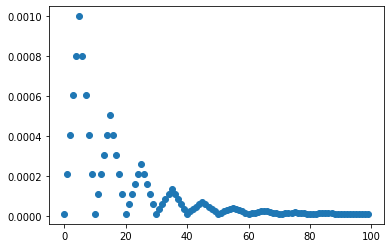

In [28]:
visualize_scheduler(optimizer, scheduler, epochs)

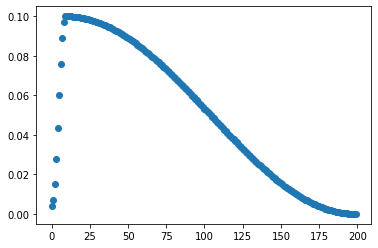

In [44]:
epochs = 200

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer=optimizer,
    max_lr=0.1,
    steps_per_epoch=1,
    epochs=200,
    pct_start=0.05,
)
visualize_scheduler(optimizer, scheduler, epochs)

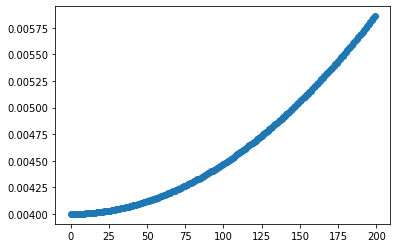

In [41]:
epochs = 200

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer=optimizer,
    max_lr=0.1,
    steps_per_epoch=224,
    epochs=200,
    pct_start=0.05,
)
visualize_scheduler(optimizer, scheduler, epochs)

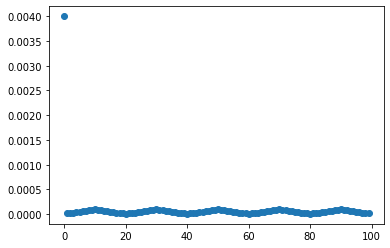

In [46]:
epochs = 100
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer=optimizer,
    base_lr=5e-6,
    max_lr=1e-4,
    step_size_up=10,
    step_size_down=None,
    cycle_momentum=False,
    mode='triangular',
)
visualize_scheduler(optimizer, scheduler, epochs)